# Chapter 7 : Signal Processing and Time Series

## 7.1. Statmodes and environments prepration

* 信号处理: 要用于分析模拟信号和数字信号随时间变化的变量
* 时间序列分析: 信号处理技术的一个分支，等间隔数据采样，找出某个值与该序列中之前特定周期数上的另一个数据点或者一组数据点之间的关系

### 7.1.1 make sure the notebook work both for python2 and python3 

In [1]:
from __future__ import division, print_function, unicode_literals

### 7.1.2 install and import required libs

In [2]:
#un-comment code below and run it if lib does not exists
#!pip3 install --upgrade statsmodels
#!pip3 install --upgrade pid
#!pip3 install --upgrade pandas

In [3]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pandas as pd
import pydoc
import statsmodels as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

### 7.1.3 modules in statsmodels

In [4]:
print("Statsmodels version", sm.__version__)

def clean(astr):
   s = astr
   # remove multiple spaces
   s = ' '.join(s.split())
   s = s.replace('=','')

   return s

def print_desc(prefix, pkg_path):
   for pkg in pu.iter_modules(path=pkg_path):
      name = prefix + "." + pkg[1]

      if pkg[2] == True:
         try:
            docstr = pydoc.plain(pydoc.render_doc(name))
            docstr = clean(docstr)
            start = docstr.find("DESCRIPTION")
            docstr = docstr[start: start + 140]
            print(name, docstr)
         except:
            continue

print("\n")
print_desc("statsmodels", sm.__path__)

Statsmodels version 0.9.0


statsmodels.base 
statsmodels.compat 
statsmodels.datasets 
statsmodels.discrete 
statsmodels.distributions 
statsmodels.duration 
statsmodels.emplike 
statsmodels.formula 
statsmodels.genmod 
statsmodels.graphics 
statsmodels.imputation 
statsmodels.interface 
statsmodels.iolib 
statsmodels.miscmodels 
statsmodels.multivariate 
statsmodels.nonparametric DESCRIPTION For an overview of this module, see docs/source/nonparametric.rst PACKAGE CONTENTS _kernel_base _smoothers_lowess api bandwidths
statsmodels.regression 
statsmodels.resampling 
statsmodels.robust 
statsmodels.sandbox 
statsmodels.src 
statsmodels.stats 
statsmodels.tools 
statsmodels.tsa 


## 7.2 Moving Average

* 移动平均（SMA）：计算滑动窗口内数据的平均值，窗口每滑动一格，计算一个新的均值
* 指数移动平均（EMA）：越旧的数据、对EMA的影响越弱（EMA<sub> n</sub> = EMA<sub> n-1</sub> + alpha (P<sub> n</sub> - EMA<sub> n-1</sub>)

In [5]:
#pandas.stats is deprecated, we need use api in other libs like statsmodels
#from pandas.stats.moments import rolling_mean 
import matplotlib.pyplot as plt
import statsmodels.api as sm

data_loader = sm.datasets.sunspots.load_pandas() # sun spots data set
df = data_loader.data
df.info()
df.head(n=3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
YEAR           309 non-null float64
SUNACTIVITY    309 non-null float64
dtypes: float64(2)
memory usage: 4.9 KB


,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0


In [6]:
year_range = df["YEAR"].values
year_range[:5]

array([1700., 1701., 1702., 1703., 1704.])

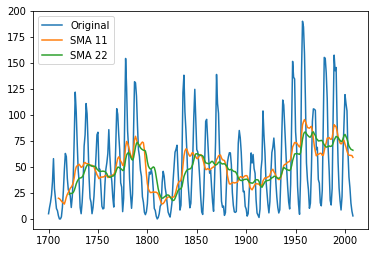

In [7]:
plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
plt.plot(year_range, df.rolling(window=11).mean()["SUNACTIVITY"].values, label="SMA 11") #SMA 11
plt.plot(year_range, df.rolling(window=22).mean()["SUNACTIVITY"].values, label="SMA 22") #SMA 22
plt.legend()
plt.show()

## 7.3 Window Function
* 窗口函数：定义在一个区间（窗口）上的函数，超出定义域，函数值取零。可以使用它们来分析频谱、设计滤波器等
* 窗口介绍：https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html
    * Boxcar（矩形窗口）：w(n) = 1
    * Triang（三角形窗口, L可以是N,N+1或N-1）：w(n) = 1 - |(n - (N-1)/2) / (L/2)|
    * Bartlett Window（钟形的布莱克曼窗口）： w(n) = a<sub>0</sub> - a<sub>1</sub>*cos(2*pi*n/(N-1)) + a<sub>2</sub>*cos(4*pi*n/(N-1))
    * Hanning Window (钟形的汗宁窗口）：w(n) = 0.5*(1 - cos(2*pi*n/(N-1))

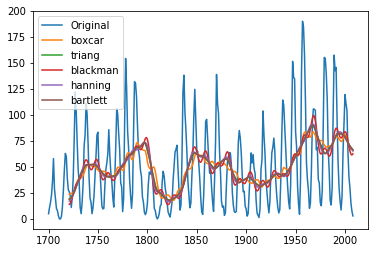

In [8]:
#pandas.stats is depricated, use another code to do this

#import matplotlib.pyplot as plt
#import statsmodels.api as sm
#from pandas.stats.moments import rolling_window
#import pandas as pd

#data_loader = sm.datasets.sunspots.load_pandas()
#df = data_loader.data.tail(150)
#df = pd.DataFrame({'SUNACTIVITY':df['SUNACTIVITY'].values}, index=df['YEAR'])
#ax = df.plot()

#def plot_window(win_type):
#    df2 = rolling_window(df, 22, win_type)
#    df2.columns = [win_type]
#    df2.plot(ax=ax)

#plot_window('boxcar')
#plot_window('triang')
#plot_window('blackman')
#plot_window('hanning')
#plot_window('bartlett')
#plt.show()

import matplotlib.pyplot as plt
import statsmodels.api as sm

data_loader = sm.datasets.sunspots.load_pandas() # sun spots data set
df = data_loader.data
year_range = df["YEAR"].values
plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
# 窗口长度取22是因为太阳黑子有3个周期，11年，22年，100年
plt.plot(year_range, df.rolling(window=22, win_type='boxcar').mean()["SUNACTIVITY"].values, label="boxcar")
plt.plot(year_range, df.rolling(window=22, win_type='triang').mean()["SUNACTIVITY"].values, label="triang")
plt.plot(year_range, df.rolling(window=22, win_type='blackman').mean()["SUNACTIVITY"].values, label="blackman")
plt.plot(year_range, df.rolling(window=22, win_type='hanning').mean()["SUNACTIVITY"].values, label="hanning")
plt.plot(year_range, df.rolling(window=22, win_type='bartlett').mean()["SUNACTIVITY"].values, label="bartlett")
plt.legend()
plt.show()

## 7.4 协整
* 协整： 定义两个时间序列相关性。如果两个时间序列x(t)和y(t)的线性组合是稳态的，那么就称这两个序列具有共整合性或协整性。在这种情况下，方程式y(t) = a * x(t)应该是稳态的
* 协整与相关性的区别（考虑醉汉与狗在一起散步的情形）：
    * 相关性： 反映出他们是否在同一个方向上前进
    * 协整： 反映一段时间后人和狗之间的距离
* 如何计算：增广迪基福勒检验法（AugmentedDickeyFullertest，ADF）可以测试时间序列中的单位根，也可用于确定时间序列的协整关系

(1) libs and functions

In [9]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np

# 计算两个时间序列之间的ADF统计量
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()    
    return ts.adfuller(result.resid)

(2) load data

In [10]:
data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data.values
N = len(data)
print("---\n", N,"\n---\n",data[:2],"\n---\n",data[-2:],"\n---")

---
 309 
---
 [[1700.    5.]
 [1701.   11.]] 
---
 [[2007.     7.5]
 [2008.     2.9]] 
---


In [11]:
# 相同序列之间的ADF统计量（ADF度量值，P, 时间延迟, 样本量, Dict(样本量的t分布值))
time = np.linspace(-2 * np.pi, 2 * np.pi, N)
cosi = np.cos(np.cos(time))
# 可以看出相关度非常高
# (1) P值是0.9585，非常高
# (2) ADF度量值是-4.9647E-16，比字典中所有的临界值都高
print("Self ADF: \n", calc_adf(cosi, cosi))

Self ADF: 
 (-4.964718889594304e-16, 0.9585320860600559, 0, 308, {'1%': -3.45176116018037, '10%': -2.571794416006072, '5%': -2.870970093607691}, -21674.046609391728)


In [12]:
# 增加噪声的序列，与原序列的ADF统计量
noise = np.random.normal(0, .01, N)
# 相关度差、且拒绝协整
# (1) P值大幅降低，为1.36E-29
# (2) ADF度量值是-16.7，低于字典中所有的临界值
print("ADF sine with noise: \n", calc_adf(cosi, cosi + noise))

ADF sine with noise: 
 (-17.761511519928742, 3.3369087499562166e-30, 0, 308, {'1%': -3.45176116018037, '10%': -2.571794416006072, '5%': -2.870970093607691}, -1831.0266894570573)


In [13]:
# 再举个例子
sine  = np.sin(np.sin(time))
print("ADF sine vs cosine with noise: \n", calc_adf(sine, cosi + noise))

ADF sine vs cosine with noise: 
 (-4.907910743786919, 3.365872919996718e-05, 16, 292, {'1%': -3.4529449243622383, '10%': -2.572071437887033, '5%': -2.871489553425686}, -6040.2798105453)


In [14]:
# 比较sini与太阳黑子数据
print("Sine vs sunspots:\n", calc_adf(sine, data))

Sine vs sunspots:
 (-6.7242691810701025, 3.4210811915548775e-09, 16, 292, {'1%': -3.4529449243622383, '10%': -2.572071437887033, '5%': -2.871489553425686}, -1102.5867415291168)


## 7.5 自相关
* 对两个给定的时间序列，我们只要知道其均值（$\mu$）和标准差（$\sigma$），就可以用期望值算子
E((X<sub>t</sub>-$\mu$<sub>t</sub>)(X<sub>s</sub>-$\mu$<sub>s</sub>))/$\sigma$<sub>t</sub>*$\sigma$<sub>s</sub>
来定义时间s和t的相关性
* 自相关公式本质上就是把相关性公式应用在同一个时间序列的先前部分和滞后部分

(1) 加载数据

In [15]:
#in version later than pandas 0.19, module plotting is moved to top layer 'pandas' from 'padas.tools'
#from pandas.tools.plotting import autocorrelation_plot 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data["SUNACTIVITY"].values
print("data[:10]:\t",data[:10])

data[:10]:	 [ 5. 11. 16. 23. 36. 58. 29. 20. 10.  8.]


(2) 计算自相关性

In [16]:
y = data - np.mean(data)
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm
res = correlated[int(len(correlated)/2):]
print("res[:5]:",res[:5])

res[:5]: [ 1.          0.82020129  0.45126849  0.03957655 -0.27579196]


(3) 自相关性最高的5个时间延迟值

In [17]:
print(np.argsort(res)[-5:])  
# 0:  延迟 0个周期 (自己与自己自相关性最高，为1.0)
# 1:  延迟 1个周期（延迟1个周期自相关性次高，为0.82）
# 10: 延迟10个周期（延迟1个周期自相关性次高，为0.66）
# ...
print(res[0],res[1],res[10],res[11],res[9])

[ 9 11 10  1  0]
1.0 0.8202012944200223 0.6589800155363378 0.650290819840704 0.47309753089805967


(4)可视化，绘制各个延迟周期下，自相关性的值

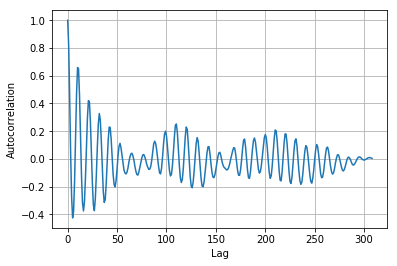

In [18]:
plt.plot(res)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

(5) 可视化，用pandas的API再绘制一次

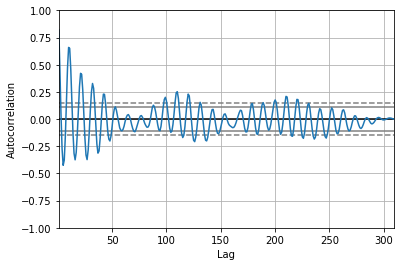

In [19]:
autocorrelation_plot(data)
plt.show()

## 自回归（Autoregressive）
* 自回归：用于预测将来的值，它假定随机变量的值依赖于它之前某些时间点的值，通常假定值的关系是线性的
* X<sub>t</sub> = C + SUM<sub>1</sub><sup>p</sup>(a<sub>i</sub>X<sub>t-i</sub>) + $\epsilon$ （其中C是常数项偏置，$\epsilon$是白噪声，公式与线性回归类似，差别在于所使用的特征X<sub>i</sub>，线性回归的一些技巧应当也可以用在这里）
* 所要做的就是拟合参数，为了防止过拟合，需要使用交叉验证

(1) 公用函数

In [20]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# predict function
def model(p, x1, x10):
    p1, p10 = p
    return p1 * x1 + p10 * x10

# distance between real value and predict value
def error(p, data, x1, x10):
    return data - model(p, x1, x10)

# p is model parameter
def fit(data):
    p0 = [.5, 0.5]
    # p0:       --> for parameter 'p'    of the error function above
    # data[10:] --> for parameter 'data' of the error function above
    # data[9:-1]--> for parameter 'x1'   of the error function above
    # data[:-10]--> for parameter 'x10'  of the error function above
    leastsq_output = leastsq(error, p0, args=(data[10:], data[9:-1], data[:-10]))
    params = leastsq_output[0]
    return params

(2) 加载数据

In [21]:
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
print("sunsspots\n", sunspots[:3])

sunsspots
 [ 5. 11. 16.]


(3) 训练模型

In [22]:
cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff])
print("Params", params)

Params [0.67172672 0.33626295]


(4) 评估模型

In [23]:
pred   = params[0] * sunspots[cutoff-1:-1] + params[1] * sunspots[cutoff-10:-10]
actual = sunspots[cutoff:]
mid    = (actual + pred)/2
print("pred[:3]", pred[:3])
print("actual[:3]", actual[:3])
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error",    np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))
print("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum())

pred[:3] [ 54.08273127  97.6104632  139.52581124]
actual[:3] [ 92.5 155.4 154.6]
Root mean square error 22.8148122612597
Mean absolute error 17.651544650286237
Mean absolute percentage error 60.78178007359871
Symmetric Mean absolute percentage error 34.98433861762137
Coefficient of determination 0.7999402927786483


(5) 预测结果散点图

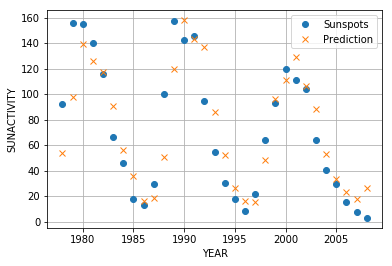

In [24]:
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

## 7.7 ARMA
* https://www.jianshu.com/p/cced6617b423
* 用于预测时间序列未来的值，由自回归（Autoregressive，AR) 和移动平均模型（Moving Average，MA) 结合而成
* 假定随机变量分为噪声分量的线性组合，与时间序列的均值之和，下面是一个由p个自回归项和q个移动平均项组成的ARMA模型公式
* X<sub>t</sub> = C + SUM<sub>i=1</sub><sup>p</sup>(a<sub>i</sub>x<sub>t-i</sub>) + SUM<sub>i=1</sub><sup>q</sup> (b<sub>i</sub>$\epsilon$<sub>t-i</sub>)
* 上面公式包含了常数项C，自回归项（p个），移动平均项（q个），当然还缺了白噪声部分需要拟合。这部分封装在statsmodelssm.tsa.ARMA()中

(1) 加载数据

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
years = df["YEAR"].values.astype(int)
df.index = pd.Index(sm.tsa.datetools.dates_from_range(str(years[0]), 
str(years[-1])))
del df["YEAR"]

print(str(years[-1]))
print(df.head(n=3))

2008
            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0


(2) 训练模型和预测

In [26]:
# df: endogenous variable
# (10,1): 
#   k_ar = 10, k_ar就是上面公式中的p，表示自回归项的个数
#   k_ma = 1,  k_ma就是上面公式中的q，表示移动平均项的个数
model = sm.tsa.ARMA(df, (10,1)).fit()

# 1975: start
# str(years[-1]): end
prediction = model.predict('1975', str(years[-1]), dynamic=True)
print(prediction.head(n=3))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


1975-12-31    28.850777
1976-12-31    43.827280
1977-12-31    61.642490
Freq: A-DEC, dtype: float64


(3) 预测结果可视化

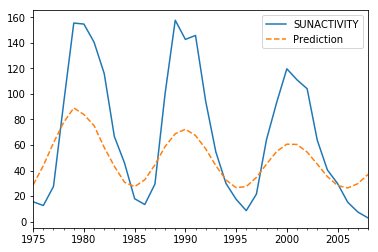

In [27]:
# it's overfitting, model in $7.6 is better
df['1975':].plot()
prediction.plot(style='--', label='Prediction')
plt.legend()
plt.show()

## 7.8 Hilbert Huang Transform
* 许多自然现象就像精确的时钟一样，具有规律性，希尔伯特黄变换（HilbertHuangtransform）用来发现这种规律
* 科学家小组发现太阳黑子活动具有3个不同的周期。这3个周期的持续时间大致为11年、22年和100年，我们使用正弦函数之类的三角函数来模拟周期信号
* 因为这里有3个周期，所以看上去通过3个正弦函数线性组合成一个模型比较合理

(1) 加载python modules和公用方法

In [28]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

def model(parameters, time):
    C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = parameters 
    return C + (p1 * np.sin(f1 * time + phi1)) + (p2 * np.sin(f2 * time + phi2)) + (p3 * np.sin(f3 * time + phi3))

def error(parameters, y, time):
    return y - model(parameters, time)

def fit(y, time):
    # initial value of parameters
    p0 = [y.mean(),    0, 2 * np.pi/11, 0,     0, 2 * np.pi/22, 0,     0, 2 * np.pi/100, 0] 
    # train parameters
    params = leastsq(error, p0, args=(y, time))[0]
    # return
    return params

(2) 加载数据

In [29]:
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values
cutoff = int(.9 * len(sunspots))

print("sunspots[:3]: ", sunspots[:3])
print("years[:3]", years[:3])
print("cutoff: ", cutoff)

sunspots[:3]:  [ 5. 11. 16.]
years[:3] [1700. 1701. 1702.]
cutoff:  278


(3) 训练模型

In [30]:
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)

Params [ 47.1880006   28.89947462   0.56827279   6.51178464   4.55214564
   0.29372076 -14.30924768 -18.16524123   0.06574835  -4.37789476]


(4) 模型评估

In [31]:
pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
mid = (actual + pred)/2

print("Root mean square error:\t", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error:\t", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error:\t", 100 * np.mean(np.abs(actual - pred)/actual))
print("Symmetric Mean absolute percentage error:\t", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination (1 means perfect, negative means very bad):\t", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum())

Root mean square error:	 59.56205597915569
Mean absolute error:	 44.58158470150657
Mean absolute percentage error:	 65.16458348768887
Symmetric Mean absolute percentage error:	 78.4480696873044
Coefficient of determination (1 means perfect, negative means very bad):	 -0.3635315489903188


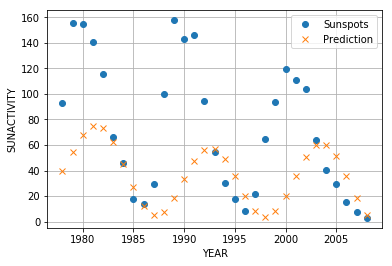

In [32]:
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

## 7.9 傅立叶分析
* 傅立叶级数：是一种函数的数学表示方法，使用正弦函数和余弦函数构成的无穷级数来表示函数，这些函数可以是实值函数、也可以是虚函数
* 傅立叶分析：对时间序列来说，将数据从时域映射到频域上，从而得到一个频谱
* 对某些频谱来说，它们会在某些特定频率上表现出一些尖峰（例如乐曲中的音符）
* 而白噪声则是由许多频率不同的信号组成，这些信号功率一样

(1) 加载Python Modules和函数

In [33]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft      # 对实数进行快速傅立叶变换
from scipy.fftpack import fftshift  # 把零频率分量（数据平均值）移动到频谱中央，看起来会更舒服一些

(2) 加载数据

In [34]:
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

time = np.linspace(-2 * np.pi, 2 * np.pi, len(sunspots))
mid  = np.ptp(sunspots)/2
sine = mid + mid * np.sin(np.sin(time))

print("time[:3]:\t", time[:3])
print("mid:     \t", mid)
print("sine[:3]:\t", sine[:3])

time[:3]:	 [-6.28318531 -6.2423854  -6.2015855 ]
mid:     	 95.1
sine[:3]:	 [ 95.1         98.97791904 102.84295249]


(3) 对正弦波、以及太阳黑子数据进行快速傅立叶变换

In [35]:
sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])

transformed = np.abs(fftshift(rfft(sunspots)))
print("Indices of max sunspots FFT", np.argsort(transformed)[-5:])

Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


(4) 正弦波、以及太阳黑子数据的振幅频率

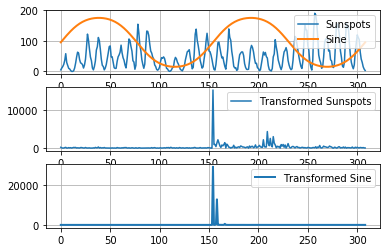

In [36]:
plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.plot(sine, lw=2, label="Sine")
plt.grid(True)
plt.legend()
plt.subplot(312)
plt.plot(transformed, label="Transformed Sunspots")
plt.grid(True)
plt.legend()
plt.subplot(313)
plt.plot(sine_fft, lw=2, label="Transformed Sine")
plt.grid(True)
plt.legend()
plt.show()

## 7.10 谱分析
物理信号的功率频谱可以直观地展现该信号的能量分布

In [37]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

print("sunspots[:5]:\t", sunspots[:5])

sunspots[:5]:	 [ 5. 11. 16. 23. 36.]


In [38]:
transformed = fftshift(rfft(sunspots)) # 快速傅立叶变换
power_spectrum = transformed ** 2      # 功率频率
phase_spectrum = np.angle(transformed) # 相位谱、展现正弦函数的起始角

print("transformed[:4]:\t", transformed[:4])
print("power_spectrum[:4]:\t", power_spectrum[:4])
print("phase_spectrum[:4]:\t", phase_spectrum[:4])

transformed[:4]:	 [-234.87273536   78.46748602   17.87315559   28.9928048 ]
power_spectrum[:4]:	 [55165.20181716  6157.14636268   319.4496909    840.58273011]
phase_spectrum[:4]:	 [3.14159265 0.         0.         0.        ]


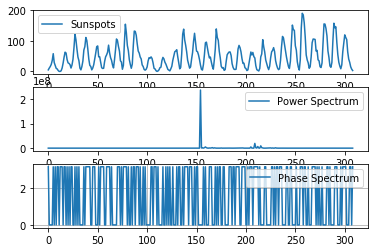

In [39]:
plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.legend()
plt.subplot(312)
plt.plot(power_spectrum, label="Power Spectrum")
plt.legend()
plt.subplot(313)
plt.plot(phase_spectrum, label="Phase Spectrum")
plt.grid(True)
plt.legend()
plt.show()

## 7.11 滤波
* 滤波是一种信号处理技术，可以对信号的某些部分进行删减和抑制
* 应用FFT之后，就可以对高频或低频进行过滤，或者设法删除白噪声（功率频率为常数的随机信号、不含任何有用信息）了

(1) lib and functions

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import medfilt  # 中值滤波器，用来计算滚动窗口的中值，可通过参数指定可选窗口的大小
from scipy.signal import wiener   # Wiener滤波器，通过统计数值来删除噪声，对于一个滤波器g(t)与一个信号s(t)，可通过(g*[s+n])(t)来计算其卷积
from scipy.signal import detrend  # 用来删除趋势。它可以是一个线性或者不变趋势

(2) load data

In [41]:
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

print("sunspots[:5]",sunspots[:5])
print("years[:5]",years[:5])

sunspots[:5] [ 5. 11. 16. 23. 36.]
years[:5] [1700. 1701. 1702. 1703. 1704.]


(3) plot

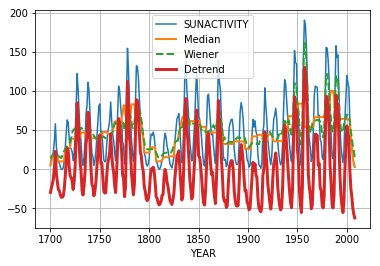

In [42]:
plt.plot(years, sunspots, label="SUNACTIVITY")
plt.plot(years, medfilt(sunspots, 11), lw=2, label="Median")
plt.plot(years, wiener(sunspots, 11), '--', lw=2, label="Wiener")
plt.plot(years, detrend(sunspots), lw=3, label="Detrend")
plt.xlabel("YEAR")
plt.grid(True)
plt.legend()
plt.show()